In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#pipelines
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer, make_column_selector, make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler
from sklearn.impute import SimpleImputer

#fitting
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('complete_dataset (1).csv')

In [3]:
df.head()

,date,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall,school_day,holiday
0,2015-01-01,99635.030,25.633696,97319.240,26.415953,2315.790,-7.240000,0.020833,13.3,26.9,23.6,0.0,N,Y
1,2015-01-02,129606.010,33.138988,121082.015,38.837661,8523.995,-47.809777,0.062500,15.4,38.8,26.8,0.0,N,N
2,2015-01-03,142300.540,34.564855,142300.540,34.564855,0.000,0.000000,0.000000,20.0,38.2,26.5,0.0,N,N
3,2015-01-04,104330.715,25.005560,104330.715,25.005560,0.000,0.000000,0.000000,16.3,21.4,25.2,4.2,N,N
4,2015-01-05,118132.200,26.724176,118132.200,26.724176,0.000,0.000000,0.000000,15.0,22.0,30.7,0.0,N,N


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2106 entries, 0 to 2105
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             2106 non-null   object 
 1   demand           2106 non-null   float64
 2   RRP              2106 non-null   float64
 3   demand_pos_RRP   2106 non-null   float64
 4   RRP_positive     2106 non-null   float64
 5   demand_neg_RRP   2106 non-null   float64
 6   RRP_negative     2106 non-null   float64
 7   frac_at_neg_RRP  2106 non-null   float64
 8   min_temperature  2106 non-null   float64
 9   max_temperature  2106 non-null   float64
 10  solar_exposure   2105 non-null   float64
 11  rainfall         2103 non-null   float64
 12  school_day       2106 non-null   object 
 13  holiday          2106 non-null   object 
dtypes: float64(11), object(3)
memory usage: 230.5+ KB


In [5]:
df.describe()

,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall
count,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2105.000000,2103.000000
mean,120035.476503,76.079554,119252.305055,76.553847,783.171448,-2.686052,0.008547,11.582289,20.413200,14.743373,1.505944
std,13747.993761,130.246805,14818.631319,130.114184,3578.920686,19.485432,0.039963,4.313711,6.288693,7.945527,4.307897
min,85094.375000,-6.076028,41988.240000,13.568986,0.000000,-342.220000,0.000000,0.600000,9.000000,0.700000,0.000000
25%,109963.650000,38.707040,109246.250000,39.117361,0.000000,0.000000,0.000000,8.500000,15.525000,8.200000,0.000000
50%,119585.912500,66.596738,119148.082500,66.869058,0.000000,0.000000,0.000000,11.300000,19.100000,12.700000,0.000000
75%,130436.006250,95.075012,130119.477500,95.130181,0.000000,0.000000,0.000000,14.600000,23.900000,20.700000,0.800000
max,170653.840000,4549.645105,170653.840000,4549.645105,57597.595000,0.000000,0.625000,28.000000,43.500000,33.300000,54.600000


In [6]:
df.isna().sum()

date               0
demand             0
RRP                0
demand_pos_RRP     0
RRP_positive       0
demand_neg_RRP     0
RRP_negative       0
frac_at_neg_RRP    0
min_temperature    0
max_temperature    0
solar_exposure     1
rainfall           3
school_day         0
holiday            0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

array([[<Axes: title={'center': 'RRP'}>]], dtype=object)

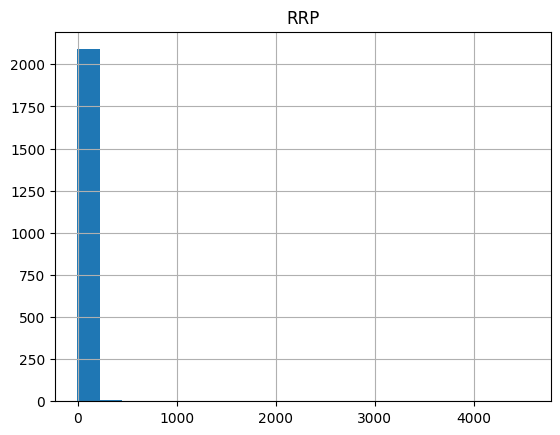

In [8]:
df.hist(column='RRP', bins=20, grid=True)

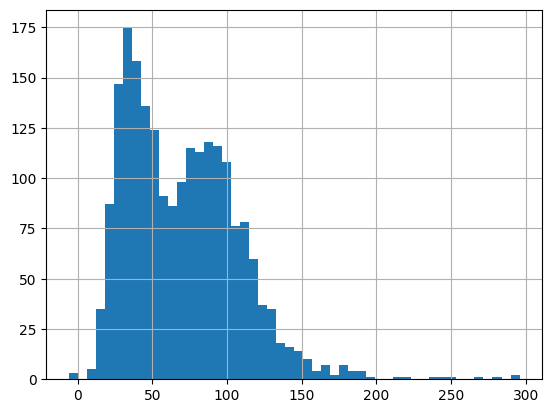

In [9]:
df['RRP'][df['RRP'] < 500].hist(bins=50)
plt.show()

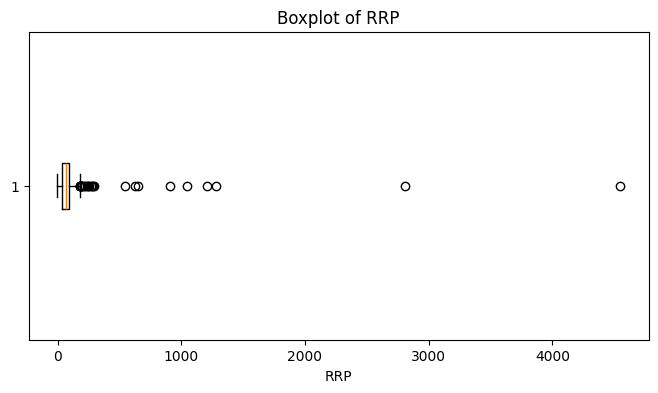

In [10]:
plt.figure(figsize=(8,4))
plt.boxplot(df['RRP'], vert=False)
plt.title("Boxplot of RRP")
plt.xlabel("RRP")
plt.show()

#TO Datetime

In [11]:
df['date'] = pd.to_datetime(df['date'])

In [12]:
df.set_index('date', inplace=True)

In [13]:
df['holiday'].unique()

array(['Y', 'N'], dtype=object)

In [14]:
df['holiday'] = df['holiday'].map({'Y': 1, 'N': 0})

In [15]:
df['school_day'].unique()

array(['N', 'Y'], dtype=object)

In [16]:
df['school_day'] = df['school_day'].map({'Y': 1, 'N': 0})

In [17]:
df.head()

,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall,school_day,holiday
date,,,,,,,,,,,,,
2015-01-01,99635.030,25.633696,97319.240,26.415953,2315.790,-7.240000,0.020833,13.3,26.9,23.6,0.0,0,1
2015-01-02,129606.010,33.138988,121082.015,38.837661,8523.995,-47.809777,0.062500,15.4,38.8,26.8,0.0,0,0
2015-01-03,142300.540,34.564855,142300.540,34.564855,0.000,0.000000,0.000000,20.0,38.2,26.5,0.0,0,0
2015-01-04,104330.715,25.005560,104330.715,25.005560,0.000,0.000000,0.000000,16.3,21.4,25.2,4.2,0,0
2015-01-05,118132.200,26.724176,118132.200,26.724176,0.000,0.000000,0.000000,15.0,22.0,30.7,0.0,0,0


In [18]:
corr = df.corr()

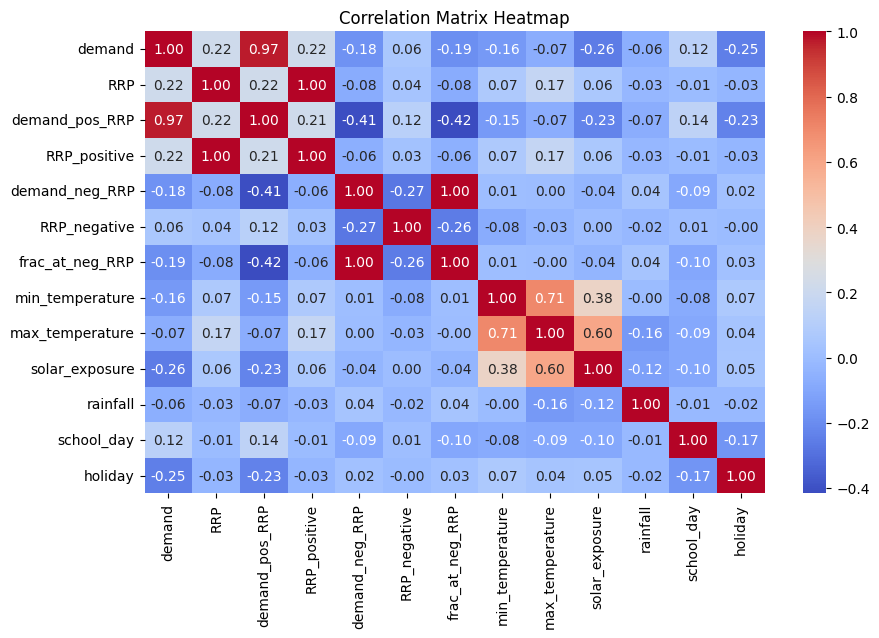

In [19]:
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2106 entries, 2015-01-01 to 2020-10-06
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   demand           2106 non-null   float64
 1   RRP              2106 non-null   float64
 2   demand_pos_RRP   2106 non-null   float64
 3   RRP_positive     2106 non-null   float64
 4   demand_neg_RRP   2106 non-null   float64
 5   RRP_negative     2106 non-null   float64
 6   frac_at_neg_RRP  2106 non-null   float64
 7   min_temperature  2106 non-null   float64
 8   max_temperature  2106 non-null   float64
 9   solar_exposure   2105 non-null   float64
 10  rainfall         2103 non-null   float64
 11  school_day       2106 non-null   int64  
 12  holiday          2106 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 230.3 KB


In [21]:
df.columns

Index(['demand', 'RRP', 'demand_pos_RRP', 'RRP_positive', 'demand_neg_RRP',
       'RRP_negative', 'frac_at_neg_RRP', 'min_temperature', 'max_temperature',
       'solar_exposure', 'rainfall', 'school_day', 'holiday'],
      dtype='object')

<Axes: >

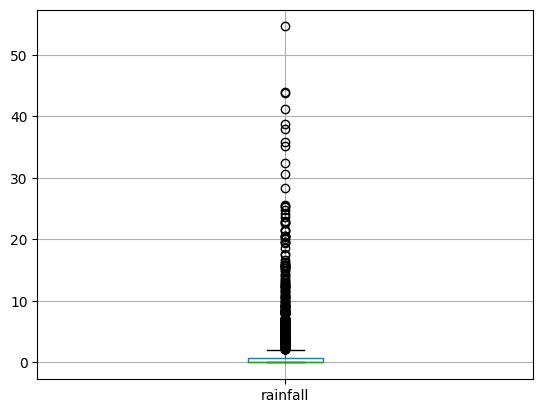

In [22]:
df[['rainfall']].boxplot()

<Axes: >

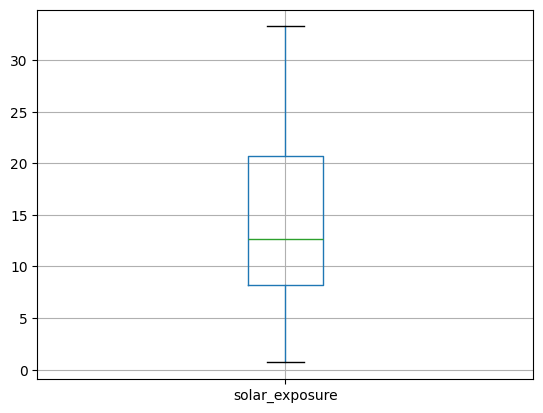

In [23]:
df[['solar_exposure']].boxplot()

<Axes: >

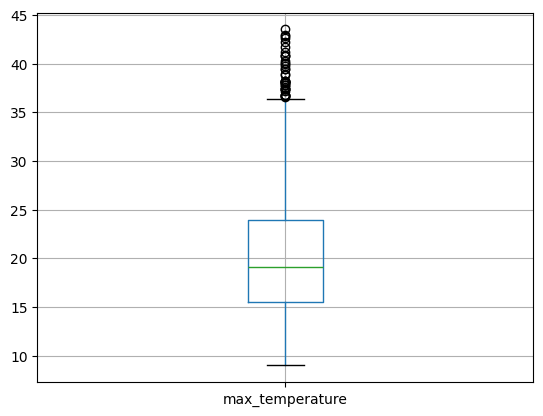

In [24]:
df[['max_temperature']].boxplot()

### Pipeline

In [25]:
num_transformer = make_pipeline(SimpleImputer(strategy='median'), RobustScaler())

In [26]:
cat_transformer = OneHotEncoder()

In [ ]:
num_col = make_column_selector(dtype_include=['float64', 'int64'])
cat_col = make_column_selector(dtype_include='object')

In [28]:
preproc = make_column_transformer(
    (num_transformer, num_col),
    (cat_transformer, cat_col)
)

In [29]:
preproc

,transformers,"[('pipeline', ...), ('onehotencoder', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [30]:
df.columns

Index(['demand', 'RRP', 'demand_pos_RRP', 'RRP_positive', 'demand_neg_RRP',
       'RRP_negative', 'frac_at_neg_RRP', 'min_temperature', 'max_temperature',
       'solar_exposure', 'rainfall', 'school_day', 'holiday'],
      dtype='object')

In [113]:
X = df.drop(columns=["RRP",'demand_pos_RRP', 'RRP_positive', 'demand_neg_RRP', 'frac_at_neg_RRP'])
y = df["RRP"]

In [114]:
X_preproc = preproc.fit_transform(X)

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X_preproc, y, test_size=0.3, random_state=42)

In [116]:
model = LinearRegression()

In [117]:
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [118]:
model.score(X_test, y_test)

/Users/fgagern/.pyenv/versions/3.10.6/envs/electricity/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/fgagern/.pyenv/versions/3.10.6/envs/electricity/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/fgagern/.pyenv/versions/3.10.6/envs/electricity/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


-0.3663683083344986

In [119]:
cv_results = cross_validate(model, X_preproc, y, cv=5)

/Users/fgagern/.pyenv/versions/3.10.6/envs/electricity/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/fgagern/.pyenv/versions/3.10.6/envs/electricity/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/fgagern/.pyenv/versions/3.10.6/envs/electricity/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_
/Users/fgagern/.pyenv/versions/3.10.6/envs/electricity/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/fgagern/.pyenv/versions/3.10.6/envs/electricity/lib/python3.10/site-packages/sklearn/linear_model/_base.py:280: RuntimeWarning: overflow encountered in matmul
  ret

In [120]:
cv_results

{'fit_time': array([0.00260592, 0.00199103, 0.00218296, 0.00114417, 0.00251293]),
 'score_time': array([0.00092387, 0.00067186, 0.0006988 , 0.00049591, 0.00100923]),
 'test_score': array([-8.06786238, -0.79581451,  0.08561843,  0.02042422,  0.12133609])}

2020-10-07    40.763815
2020-10-08    29.352543
2020-10-09    31.514000
2020-10-10    37.189762
2020-10-11    40.384068
2020-10-12    43.445208
2020-10-13    38.954513
Freq: D, Name: predicted_mean, dtype: float64


/Users/Alessio/.pyenv/versions/3.10.6/envs/electricity/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/Alessio/.pyenv/versions/3.10.6/envs/electricity/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/Alessio/.pyenv/versions/3.10.6/envs/electricity/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


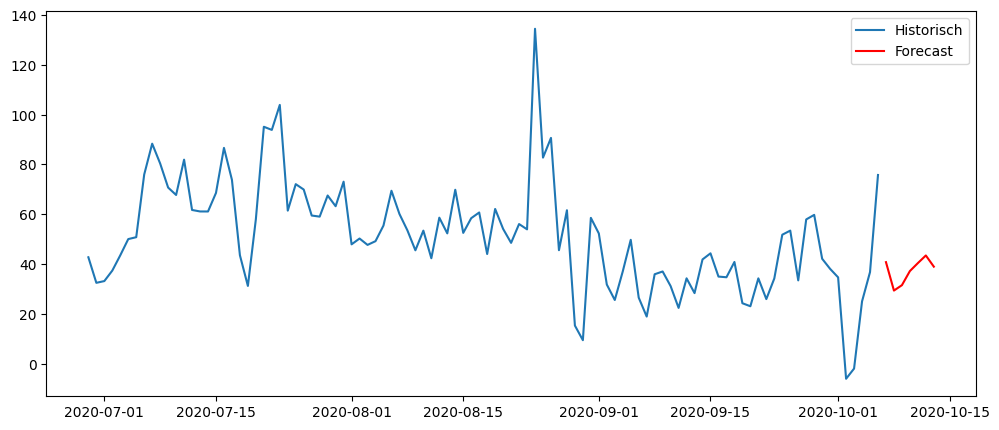

In [10]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt               # Daten laden
df = pd.read_csv("/Users/Alessio/Desktop/complete_dataset.csv")
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')       # Nur Preis-Spalte
series = df['RRP'] # ARIMA Modell trainieren (z. B. (p=5, d=1, q=0))
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit() # Prognose der nächsten 7 Tage
forecast = model_fit.forecast(steps=7)
print(forecast)
plt.figure(figsize=(12,5))
plt.plot(series[-100:], label='Historisch')
plt.plot(forecast, label='Forecast', color='red')
plt.legend()
plt.show()

/Users/Alessio/.pyenv/versions/3.10.6/envs/electricity/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/Alessio/.pyenv/versions/3.10.6/envs/electricity/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/Alessio/.pyenv/versions/3.10.6/envs/electricity/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/Alessio/.pyenv/versions/3.10.6/envs/electricity/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/Alessio/.pyenv/versions/3.10.6/envs/e

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=26269.949, Time=2.00 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=27240.733, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=26931.999, Time=0.11 sec


/Users/Alessio/.pyenv/versions/3.10.6/envs/electricity/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/Alessio/.pyenv/versions/3.10.6/envs/electricity/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/Alessio/.pyenv/versions/3.10.6/envs/electricity/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=26374.321, Time=0.53 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=27238.733, Time=0.09 sec


/Users/Alessio/.pyenv/versions/3.10.6/envs/electricity/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/Alessio/.pyenv/versions/3.10.6/envs/electricity/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,1)[7] intercept   : AIC=26267.987, Time=1.80 sec


/Users/Alessio/.pyenv/versions/3.10.6/envs/electricity/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[7] intercept   : AIC=26266.099, Time=0.56 sec


/Users/Alessio/.pyenv/versions/3.10.6/envs/electricity/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(1,0,0)[7] intercept   : AIC=26268.512, Time=0.82 sec


/Users/Alessio/.pyenv/versions/3.10.6/envs/electricity/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[7] intercept   : AIC=26264.158, Time=0.22 sec


/Users/Alessio/.pyenv/versions/3.10.6/envs/electricity/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(1,0,0)[7] intercept   : AIC=26266.044, Time=0.95 sec


/Users/Alessio/.pyenv/versions/3.10.6/envs/electricity/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,1)[7] intercept   : AIC=26266.045, Time=1.04 sec


/Users/Alessio/.pyenv/versions/3.10.6/envs/electricity/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(1,0,1)[7] intercept   : AIC=26268.018, Time=1.18 sec
 ARIMA(0,1,2)(0,0,0)[7] intercept   : AIC=26264.890, Time=0.15 sec


/Users/Alessio/.pyenv/versions/3.10.6/envs/electricity/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/Alessio/.pyenv/versions/3.10.6/envs/electricity/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[7] intercept   : AIC=26262.796, Time=0.21 sec


/Users/Alessio/.pyenv/versions/3.10.6/envs/electricity/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(1,0,0)[7] intercept   : AIC=26264.678, Time=0.86 sec


/Users/Alessio/.pyenv/versions/3.10.6/envs/electricity/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,1)[7] intercept   : AIC=26264.679, Time=0.89 sec


/Users/Alessio/.pyenv/versions/3.10.6/envs/electricity/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(1,0,1)[7] intercept   : AIC=26266.641, Time=1.01 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=26372.524, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=26930.023, Time=0.02 sec


/Users/Alessio/.pyenv/versions/3.10.6/envs/electricity/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/Alessio/.pyenv/versions/3.10.6/envs/electricity/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/Alessio/.pyenv/versions/3.10.6/envs/electricity/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[7] intercept   : AIC=26264.196, Time=0.27 sec
 ARIMA(2,1,0)(0,0,0)[7] intercept   : AIC=26748.727, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[7]             : AIC=26260.837, Time=0.09 sec


/Users/Alessio/.pyenv/versions/3.10.6/envs/electricity/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/Alessio/.pyenv/versions/3.10.6/envs/electricity/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/Alessio/.pyenv/versions/3.10.6/envs/electricity/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(1,0,0)[7]             : AIC=26262.721, Time=0.31 sec


/Users/Alessio/.pyenv/versions/3.10.6/envs/electricity/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,1)[7]             : AIC=26262.722, Time=0.42 sec


/Users/Alessio/.pyenv/versions/3.10.6/envs/electricity/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(1,0,1)[7]             : AIC=26264.677, Time=0.42 sec
 ARIMA(0,1,1)(0,0,0)[7]             : AIC=26370.529, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[7]             : AIC=26928.023, Time=0.01 sec


/Users/Alessio/.pyenv/versions/3.10.6/envs/electricity/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/Alessio/.pyenv/versions/3.10.6/envs/electricity/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/Alessio/.pyenv/versions/3.10.6/envs/electricity/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[7]             : AIC=26262.234, Time=0.16 sec
 ARIMA(1,1,2)(0,0,0)[7]             : AIC=26262.195, Time=0.13 sec


/Users/Alessio/.pyenv/versions/3.10.6/envs/electricity/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/Alessio/.pyenv/versions/3.10.6/envs/electricity/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,0)[7]             : AIC=26262.919, Time=0.08 sec
 ARIMA(2,1,0)(0,0,0)[7]             : AIC=26746.727, Time=0.03 sec


/Users/Alessio/.pyenv/versions/3.10.6/envs/electricity/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/Alessio/.pyenv/versions/3.10.6/envs/electricity/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[7]             : AIC=26264.140, Time=0.37 sec

Best model:  ARIMA(1,1,1)(0,0,0)[7]          
Total fit time: 14.942 seconds
Best ARIMA order: (1, 1, 1)
Best seasonal order: (0, 0, 0, 7)


/var/folders/9p/4lms5mqx65q09r7m652mcrv40000gn/T/ipykernel_13921/2381136395.py:35: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  exog_vars = exog_vars.fillna(method='ffill')              # Fehlende Werte auffüllen (Forward Fill)
/var/folders/9p/4lms5mqx65q09r7m652mcrv40000gn/T/ipykernel_13921/2381136395.py:36: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  exog_vars = exog_vars.fillna(method='bfill')              # Falls am Anfang noch NaN → Backward Fill
/Users/Alessio/.pyenv/versions/3.10.6/envs/electricity/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/Alessio/.pyenv/versions/3.10.6/envs/electricity/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_mo

                               SARIMAX Results                                
Dep. Variable:                    RRP   No. Observations:                 1684
Model:               SARIMAX(1, 1, 1)   Log Likelihood              -10392.141
Date:                Tue, 26 Aug 2025   AIC                          20798.281
Time:                        09:47:13   BIC                          20836.280
Sample:                    01-01-2015   HQIC                         20812.356
                         - 08-11-2019                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
demand              0.0023      0.001      3.078      0.002       0.001       0.004
min_temperature    -1.1249      3.317     -0.339      0.734      -7.625       5.376
max_temperature     3.2932      

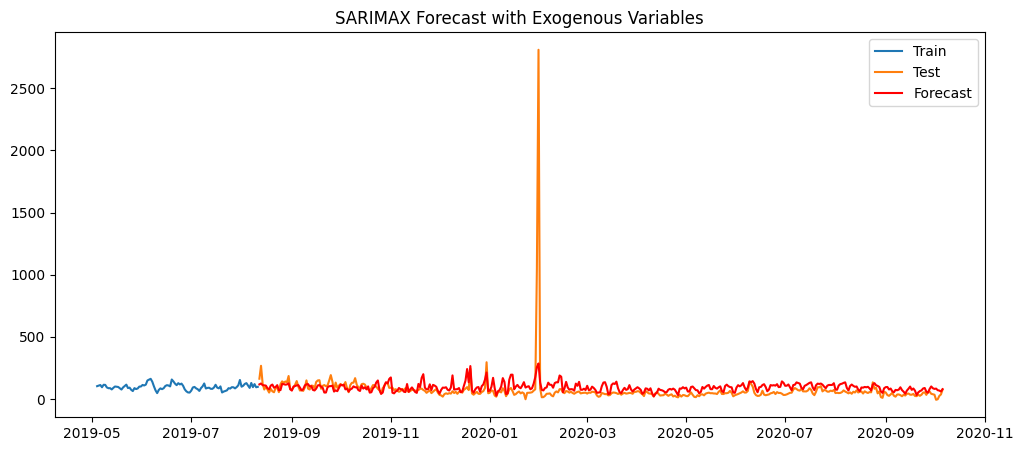

SARIMAX → MAE=47.93, RMSE=137.16, R²=0.12
Naïve baseline: MAE=24.60, RMSE=156.26, R²=-0.44
SARIMAX      : MAE=47.93, RMSE=137.16, R²=0.12


In [ ]:
import pandas as pd
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt          # Load dataset
df = pd.read_csv("/Users/Alessio/Desktop/complete_dataset.csv")
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date').set_index('date')# Univariate time series
series = df['RRP'] #  choose exogenous variables
exog_vars = df[['demand', 'min_temperature', 'max_temperature', 'solar_exposure']]
auto_model = auto_arima(
    series,
    exogenous=exog_vars,      # None if just univariate
    seasonal=True,             # Include seasonality
    m=7,                       # Weekly seasonality
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True
)
print("Best ARIMA order:", auto_model.order)

print("Best seasonal order:", auto_model.seasonal_order)







from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np    # Exogene Features auswählen
exog_vars = df[['demand', 'min_temperature', 'max_temperature', 'solar_exposure']]
# Sicherstellen, dass keine NaNs oder Infs drin sind
exog_vars = exog_vars.replace([np.inf, -np.inf], np.nan)  # Inf → NaN
exog_vars = exog_vars.fillna(method='ffill')              # Fehlende Werte auffüllen (Forward Fill)
exog_vars = exog_vars.fillna(method='bfill')              # Falls am Anfang noch NaN → Backward Fill
train_size = int(len(df) * 0.8)
train_series = df['RRP'][:train_size]
test_series = df['RRP'][train_size:]
train_exog = exog_vars[:train_size]
test_exog = exog_vars[train_size:]  # Fit SARIMAX with exogenous variables
sarimax_model = SARIMAX(
    train_series,
    order=(1,1,1),
    seasonal_order=(0,0,0,7),
    exog=train_exog
)
sarimax_fit = sarimax_model.fit(disp=False)
print(sarimax_fit.summary())   # Forecast
forecast = sarimax_fit.predict(start=test_series.index[0], end=test_series.index[-1], exog=test_exog)    # Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
plt.plot(train_series[-100:], label='Train')
plt.plot(test_series, label='Test')
plt.plot(forecast, label='Forecast', color='red')
plt.legend()
plt.title("SARIMAX Forecast with Exogenous Variables")
plt.show()  #SARIMAX Forecast auf Testdaten machen
pred = sarimax_fit.get_forecast(steps=len(test_series), exog=test_exog)
pred_mean = pred.predicted_mean
# Metrik berechnen
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
mae_sarimax = mean_absolute_error(test_series, pred_mean)
rmse_sarimax = np.sqrt(mean_squared_error(test_series, pred_mean))
r2_sarimax = r2_score(test_series, pred_mean)
print(f"SARIMAX → MAE={mae_sarimax:.2f}, RMSE={rmse_sarimax:.2f}, R²={r2_sarimax:.2f}")
# vergleich mit baseline
print("Naïve baseline: MAE=24.60, RMSE=156.26, R²=-0.44")
print(f"SARIMAX      : MAE={mae_sarimax:.2f}, RMSE={rmse_sarimax:.2f}, R²={r2_sarimax:.2f}")


In [1]:
import pandas as pd
import numpy as np
from darts import TimeSeries
from darts.models import LinearRegressionModel
from darts.metrics import mae, rmse, r2_score
# 1. Load data
df = pd.read_csv("/Users/Alessio/Desktop/complete_dataset.csv")
df['date'] = pd.to_datetime(df['date'])
series = TimeSeries.from_dataframe(df, 'date', 'RRP')
# 2. Feature Engineering
# Make sure to handle all non-numeric conversions FIRST.
# Convert school_day and holiday to 0/1
df['school_day'] = df['school_day'].map({'Y': 1, 'N': 0})
df['holiday'] = df['holiday'].map({'Y': 1, 'N': 0})
# Calendar features
df['dayofweek'] = df['date'].dt.dayofweek
df['month'] = df['date'].dt.month
df['weekofyear'] = df['date'].dt.isocalendar().week.astype(int)
df['is_weekend'] = (df['dayofweek'] >= 5).astype(int)
# Lag features (1, 7, 14 days back)
for lag in [1, 7, 14]:
    df[f'lag_{lag}'] = df['RRP'].shift(lag)
# Rolling means
df['rolling_mean_7'] = df['RRP'].rolling(7).mean()
df['rolling_mean_30'] = df['RRP'].rolling(30).mean()
# Interaction features
df['temp_range'] = df['max_temperature'] - df['min_temperature']
df['rain_x_temp'] = df['rainfall'] * df['max_temperature']
# 3. Handle NaNs (from lags/rollings)
# This step is critical and must be done after all feature creation.
df = df.fillna(method="bfill").fillna(method="ffill")
# 4. Build covariates TimeSeries
feature_cols = [
    'min_temperature', 'max_temperature', 'solar_exposure', 'rainfall',
    'school_day', 'holiday',
    'dayofweek', 'month', 'weekofyear', 'is_weekend',
    'lag_1', 'lag_7', 'lag_14',
    'rolling_mean_7', 'rolling_mean_30',
    'temp_range', 'rain_x_temp'
]
# Ensure all columns are numeric
for col in feature_cols:
    # Use to_numeric with 'coerce' to handle any unexpected non-numeric values
    # and then fill any NaNs created.
    df[col] = pd.to_numeric(df[col], errors='coerce')
# Fill any NaNs that might have been introduced
df = df.fillna(method="bfill").fillna(method="ffill")
# Now build covariates TimeSeries
covariates_ts = TimeSeries.from_dataframe(df, 'date', feature_cols)
# Extend covariates horizon
from darts.utils.timeseries_generation import datetime_attribute_timeseries
# Fill 7 extra days by repeating last values
extra_days = pd.date_range(df['date'].max() + pd.Timedelta(days=1),
  periods=7, freq="D")
extra_cov = pd.DataFrame(index=extra_days)
for col in feature_cols:
    extra_cov[col] = df[col].iloc[-1]  # repeat last value
extra_cov = extra_cov.reset_index().rename(columns={'index': 'date'})
df_extended = pd.concat([df, extra_cov], ignore_index=True)
# Rebuild covariates TimeSeries
covariates_ts = TimeSeries.from_dataframe(df_extended, 'date', feature_cols)
# Retrain/test split with extended covariates
train, test = series[:-30], series[-30:]
# Covariates for training
cov_train = covariates_ts[:-30]
# Covariates for prediction (test) must include the look-ahead window
# The max lag is 7, so we need the last 30 (for test) + 7 days
cov_test = covariates_ts[-37:]
# train model with covariants
model = LinearRegressionModel(
    lags=[-1, -2, -7],
    lags_future_covariates=[0, 1, 7]
)
model.fit(train, future_covariates=cov_train)
# forecast
pred = model.predict(len(test), future_covariates=cov_test)
# evaluate
mae_val = mae(test, pred)
rmse_val = rmse(test, pred)
r2_val = r2_score(test, pred)
print(f"LinearRegressionModel + Features  MAE={mae_val:.2f}, RMSE={rmse_val:.2f}, R²={r2_val:.3f}")


/Users/Alessio/.pyenv/versions/3.10.6/envs/electricity/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


LinearRegressionModel + Features  MAE=3.32, RMSE=9.10, R²=0.674


/var/folders/9p/4lms5mqx65q09r7m652mcrv40000gn/T/ipykernel_87428/1327791152.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method="bfill").fillna(method="ffill")
/var/folders/9p/4lms5mqx65q09r7m652mcrv40000gn/T/ipykernel_87428/1327791152.py:47: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method="bfill").fillna(method="ffill")


In [38]:
from darts import TimeSeries
from darts.models import LinearRegressionModel
from darts.metrics import mae, rmse, r2_score
import pandas as pd
# Carica dati
df = pd.read_csv("../raw_data/complete_dataset.csv")
df['date'] = pd.to_datetime(df['date'])
series = TimeSeries.from_dataframe(df, 'date', 'RRP')
# Split train/test
train = series[:-30]  # Tutti tranne ultimi 30
test = series[-30:]   # Ultimi 30 per test
# Modello
model = LinearRegressionModel(lags=7)
model.fit(train)
pred = model.predict(30)
# Metriche
mae_val = mae(test, pred)
rmse_val = rmse(test, pred)
r2_val = r2_score(test, pred)
print(f"MAE:  {mae_val:.2f}")
print(f"RMSE: {rmse_val:.2f}")
print(f"R²:   {r2_val:.3f}")


FileNotFoundError: [Errno 2] No such file or directory: '../raw_data/complete_dataset.csv'

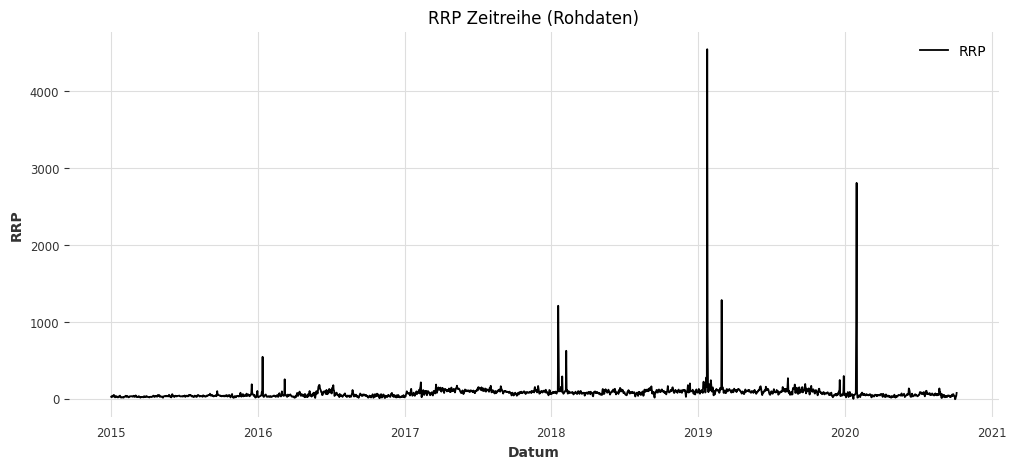

/var/folders/9p/4lms5mqx65q09r7m652mcrv40000gn/T/ipykernel_87428/4126605818.py:41: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method="bfill").fillna(method="ffill")


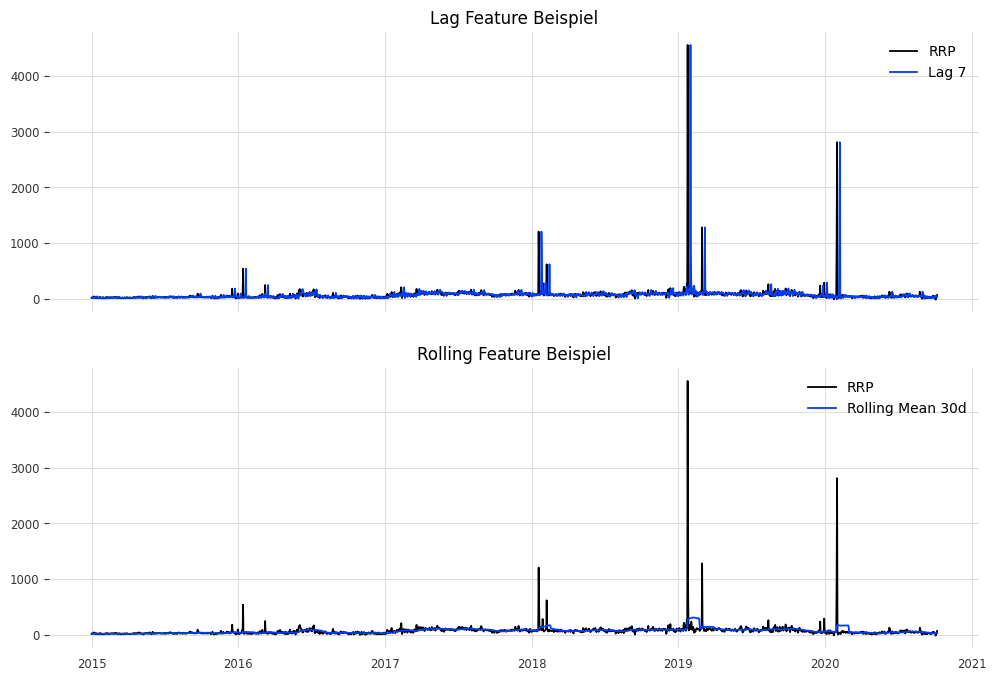

/var/folders/9p/4lms5mqx65q09r7m652mcrv40000gn/T/ipykernel_87428/4126605818.py:67: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method="bfill").fillna(method="ffill")


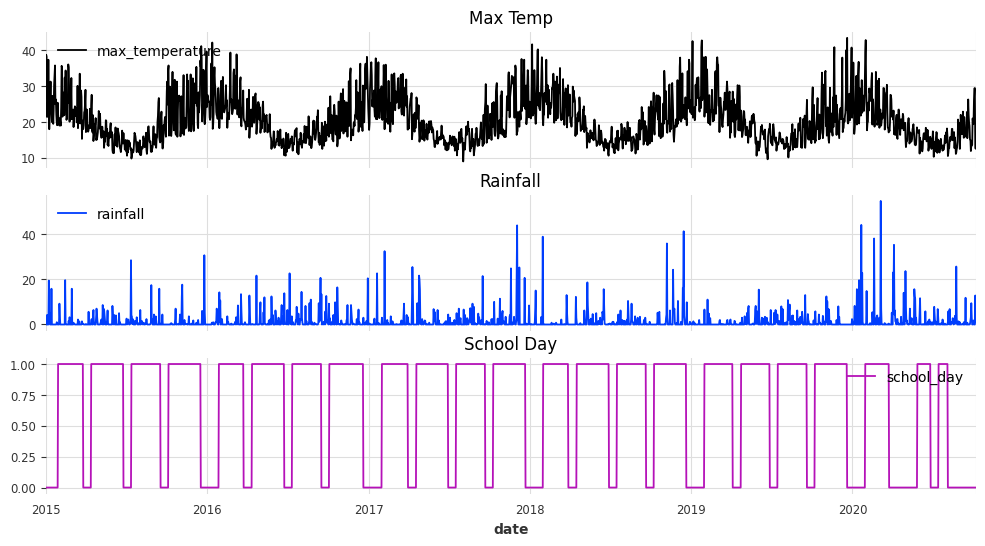

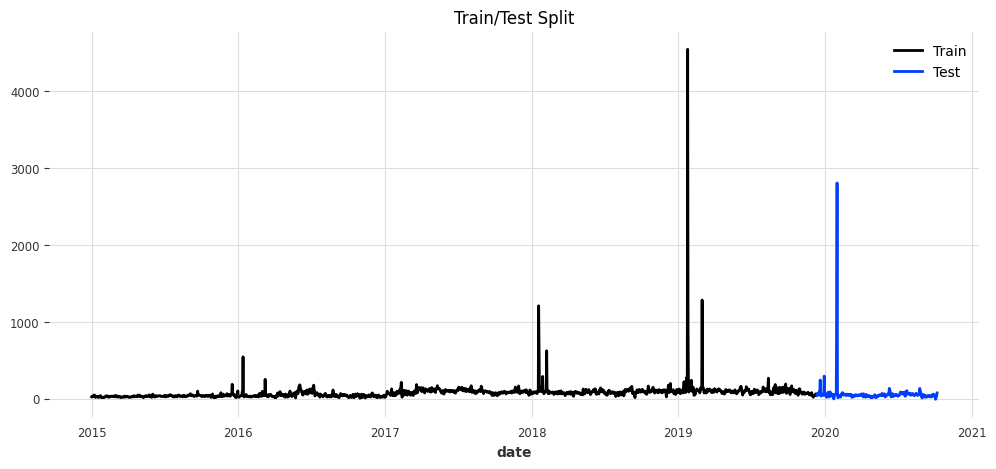

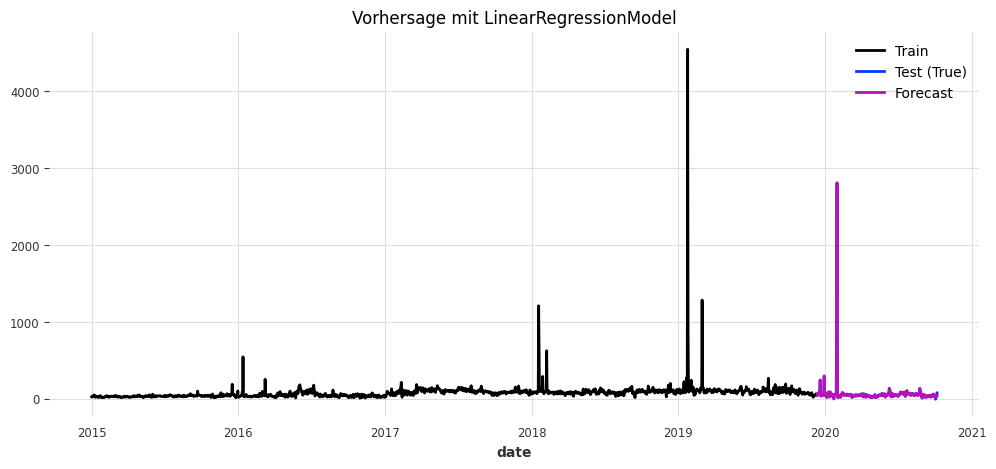

LinearRegressionModel + Features  MAE=0.33, RMSE=2.88, R²=1.000


In [24]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
from darts import TimeSeries
from darts.models import LinearRegressionModel
from darts.metrics import mae, rmse, r2_score
# 1. Load data
df = pd.read_csv("/Users/Alessio/Desktop/complete_dataset.csv")
df['date'] = pd.to_datetime(df['date'])
df.head()
series = TimeSeries.from_dataframe(df, 'date', 'RRP')
plt.figure(figsize=(12,5))
plt.plot(df['date'], df['RRP'], label="RRP")
plt.title("RRP Zeitreihe (Rohdaten)")
plt.xlabel("Datum")
plt.ylabel("RRP")
plt.legend()
plt.show()
# 2. Feature Engineering
# Make sure to handle all non-numeric conversions FIRST.
# Convert school_day and holiday to 0/1
df['school_day'] = df['school_day'].map({'Y': 1, 'N': 0})
df['holiday'] = df['holiday'].map({'Y': 1, 'N': 0})
# Calendar features
df['dayofweek'] = df['date'].dt.dayofweek
df['month'] = df['date'].dt.month
df['weekofyear'] = df['date'].dt.isocalendar().week.astype(int)
df['is_weekend'] = (df['dayofweek'] >= 5).astype(int)
# Lag features (1, 7, 14 days back)
for lag in [1, 7, 14]:
    df[f'lag_{lag}'] = df['RRP'].shift(lag)
# Rolling means
df['rolling_mean_7'] = df['RRP'].rolling(7).mean()
df['rolling_mean_30'] = df['RRP'].rolling(30).mean()
# Interaction features
df['temp_range'] = df['max_temperature'] - df['min_temperature']
df['rain_x_temp'] = df['rainfall'] * df['max_temperature']
# 3. Handle NaNs (from lags/rollings)
# This step is critical and must be done after all feature creation.
df = df.fillna(method="bfill").fillna(method="ffill")
fig, ax = plt.subplots(2, 1, figsize=(12,8), sharex=True)
ax[0].plot(df['date'], df['RRP'], label="RRP")
ax[0].plot(df['date'], df['lag_7'], label="Lag 7")
ax[0].set_title("Lag Feature Beispiel")
ax[0].legend()
ax[1].plot(df['date'], df['RRP'], label="RRP")
ax[1].plot(df['date'], df['rolling_mean_30'], label="Rolling Mean 30d")
ax[1].set_title("Rolling Feature Beispiel")
ax[1].legend()
plt.show()
# 4. Build covariates TimeSeries
feature_cols = [
    'min_temperature', 'max_temperature', 'solar_exposure', 'rainfall',
    'school_day', 'holiday',
    'dayofweek', 'month', 'weekofyear', 'is_weekend',
    'lag_1', 'lag_7', 'lag_14',
    'rolling_mean_7', 'rolling_mean_30',
    'temp_range', 'rain_x_temp'
]
# Ensure all columns are numeric
for col in feature_cols:
    # Use to_numeric with 'coerce' to handle any unexpected non-numeric values
    # and then fill any NaNs created.
    df[col] = pd.to_numeric(df[col], errors='coerce')
# Fill any NaNs that might have been introduced
df = df.fillna(method="bfill").fillna(method="ffill")
# Now build covariates TimeSeries
covariates_ts = TimeSeries.from_dataframe(df, 'date', feature_cols)
series = TimeSeries.from_dataframe(df, 'date', 'RRP')
df[['date', 'max_temperature', 'rainfall', 'school_day']].set_index('date').plot(
    subplots=True, figsize=(12,6), title=["Max Temp", "Rainfall", "School Day"]
)
plt.show()
# Extend covariates horizon
from darts.utils.timeseries_generation import datetime_attribute_timeseries
# Fill 7 extra days by repeating last values
extra_days = pd.date_range(df['date'].max() + pd.Timedelta(days=1),
  periods=7, freq="D")
extra_cov = pd.DataFrame(index=extra_days)
for col in feature_cols:
    extra_cov[col] = df[col].iloc[-1]  # repeat last value
extra_cov = extra_cov.reset_index().rename(columns={'index': 'date'})
df_extended = pd.concat([df, extra_cov], ignore_index=True)
# Rebuild covariates TimeSeries
covariates_ts = TimeSeries.from_dataframe(df_extended, 'date', feature_cols)
# Retrain/test split with extended covariates
train, test = series[:-300], series[-300:]
# Covariates for training
cov_train = covariates_ts[:-300]
# Covariates for prediction (test) must include the look-ahead window
# The max lag is 7, so we need the last 30 (for test) + 7 days
cov_test = covariates_ts[-307:]
plt.figure(figsize=(12,5))
train.plot(label="Train")
test.plot(label="Test")
plt.title("Train/Test Split")
plt.legend()
plt.show()
# train model with covariants
model = LinearRegressionModel(
    lags=[-1, -2, -7],
    lags_future_covariates=[0, 1, 7]
)
model.fit(train, future_covariates=cov_train)
# forecast
pred = model.predict(len(test), future_covariates=cov_test)
plt.figure(figsize=(12,5))
train.plot(label="Train")
test.plot(label="Test (True)")
pred.plot(label="Forecast")
plt.title("Vorhersage mit LinearRegressionModel")
plt.legend()
plt.show()
# evaluate
mae_val = mae(test, pred)
rmse_val = rmse(test, pred)
r2_val = r2_score(test, pred)
print(f"LinearRegressionModel + Features  MAE={mae_val:.2f}, RMSE={rmse_val:.2f}, R²={r2_val:.3f}")


In [25]:
from darts.models import AutoARIMA

# AutoARIMA sceglie automaticamente (p,d,q)
auto_arima = AutoARIMA(
    start_p=1, start_q=1,
    max_p=7, max_q=7,
    d=None,           # scelto automaticamente
    seasonal=False,   # se vuoi anche stagionalità → True
    stepwise=True
)
auto_arima.fit(train)
pred_autoarima = auto_arima.predict(len(test))

print("AutoARIMA MAE:", mae(test, pred_autoarima))


AutoARIMA MAE: 46.80620126601202


In [26]:
from darts.models import RegressionModel
from sklearn.ensemble import RandomForestRegressor

rf_model = RegressionModel(
    model=RandomForestRegressor(n_estimators=200, random_state=42),
    lags=[-1, -2, -7],
    lags_future_covariates=[0, 1, 7]
)
rf_model.fit(train, future_covariates=cov_train)
pred_rf = rf_model.predict(len(test), future_covariates=cov_test)

print("RandomForest MAE:", mae(test, pred_rf))


RandomForest MAE: 18.3654469443622


In [37]:
from xgboost import XGBRegressor

xgb_model = RegressionModel(
    model=XGBRegressor(n_estimators=300, max_depth=5, learning_rate=0.05, random_state=42),
    lags=[-1, -2, -7],
    lags_future_covariates=[0, 1, 7]
)
xgb_model.fit(train, future_covariates=cov_train)
pred_xgb = xgb_model.predict(len(test), future_covariates=cov_test)

print("XGBoost MAE:", mae(test, pred_xgb))


XGBoost MAE: 35.36850460654243


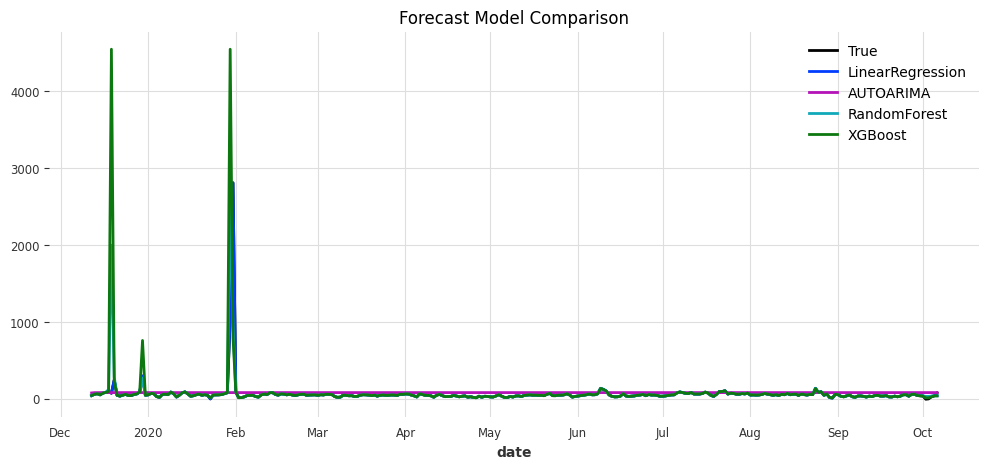

In [35]:
plt.figure(figsize=(12,5))
test.plot(label="True")
pred.plot(label="LinearRegression")
pred_autoarima.plot(label="AUTOARIMA")
pred_rf.plot(label="RandomForest")
pred_xgb.plot(label="XGBoost")
plt.title("Forecast Model Comparison")
plt.legend()
plt.show()

In [36]:
from xgboost import XGBRegressor
from darts.models import SKLearnModel
from darts.metrics import mae
import numpy as np

# XGBoost ottimizzato
xgb_opt = SKLearnModel(
    model=XGBRegressor(n_estimators=500, max_depth=7, learning_rate=0.03,
                      subsample=0.85, gamma=0.1, random_state=42),
    lags=[-1, -2, -7, -14],
    lags_future_covariates=[0, 1, 7]
)

xgb_opt.fit(train, future_covariates=cov_train)

# Safe prediction function that handles insufficient covariates
def safe_predict(model, n, future_covariates, test_series):
    # Get the maximum future lag from the model configuration
    # For SKLearnModel, we need to access the internal lags configuration
    max_future_lag = max(model.lags_future_covariates) if hasattr(model, 'lags_future_covariates') else 0

    # If we can't access it directly, assume the maximum from the known configuration
    if max_future_lag == 0:
        max_future_lag = 7  # Based on your [0, 1, 7] configuration

    available_length = len(future_covariates)

    print(f"Max future lag: {max_future_lag}")
    print(f"Available covariates length: {available_length}")
    print(f"Prediction horizon: {n}")

    if available_length >= n + max_future_lag:
        # Enough data for full prediction
        pred = model.predict(n, future_covariates=future_covariates)
        return pred, test_series

    else:
        # Predict only what we can
        possible_n = available_length - max_future_lag
        if possible_n <= 0:
            raise ValueError(f"Not enough future covariates. Need at least {max_future_lag + 1} steps, but only have {available_length}")

        print(f"Warning: Can only predict {possible_n} steps instead of {n}")

        pred = model.predict(possible_n, future_covariates=future_covariates)
        test_subset = test_series[:possible_n]
        return pred, test_subset

# Use the safe prediction function
try:
    pred_opt, test_for_eval = safe_predict(xgb_opt, len(test), cov_test, test)
    print("XGBoost Ottimizzato MAE:", mae(test_for_eval, pred_opt))
except Exception as e:
    print(f"Error during prediction: {e}")

    # Fallback: try without future covariates
    print("Trying without future covariates...")
    xgb_no_cov = SKLearnModel(
        model=XGBRegressor(n_estimators=500, max_depth=7, learning_rate=0.03,
                          subsample=0.85, gamma=0.1, random_state=42),
        lags=[-1, -2, -7, -14]
    )
    xgb_no_cov.fit(train)
    pred_no_cov = xgb_no_cov.predict(len(test))
    print("XGBoost (no covariates) MAE:", mae(test, pred_no_cov))
    plt.show()

Max future lag: 7
Available covariates length: 307
Prediction horizon: 300
XGBoost Ottimizzato MAE: 35.21449577448217


Training AutoARIMA...


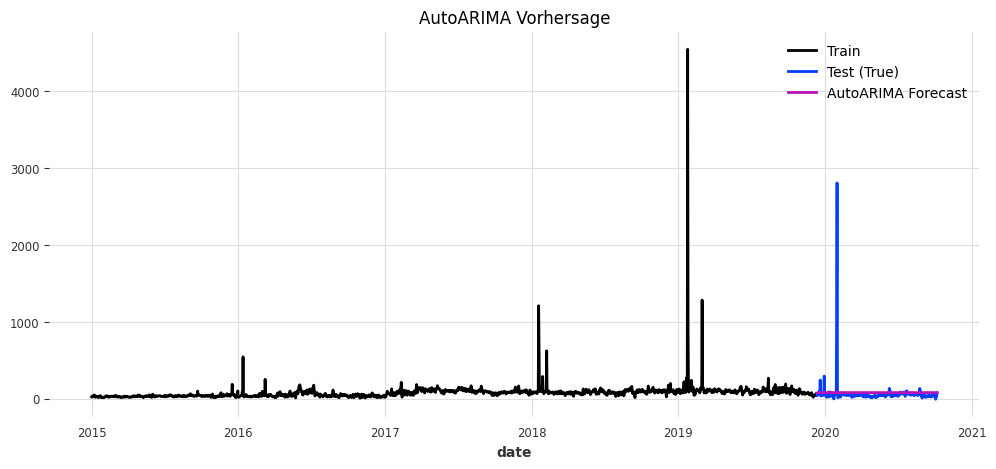

AutoARIMA MAE: 46.81, RMSE: 171.90, R²: -0.011

Training Random Forest...


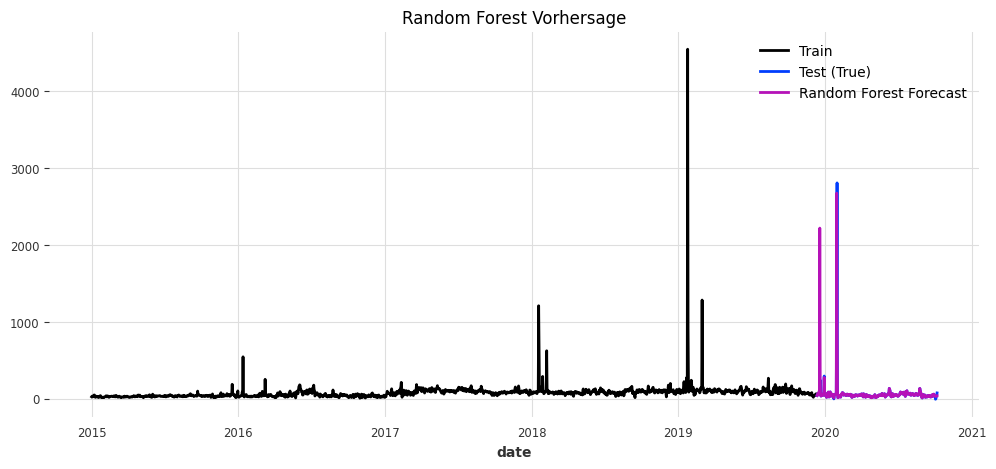

Random Forest MAE: 19.35, RMSE: 187.72, R²: -0.205

Training XGBoost...


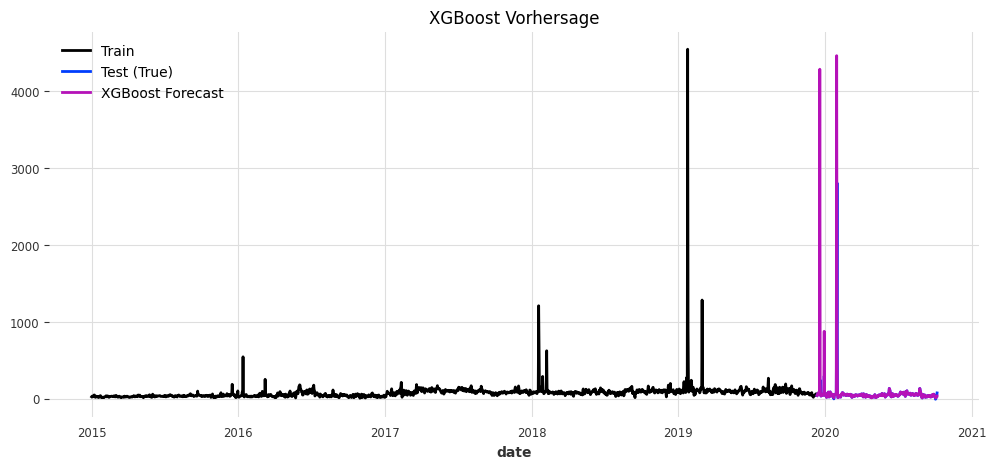

XGBoost MAE: 35.21, RMSE: 339.42, R²: -2.940

MODEL COMPARISON
Linear Regression: MAE=0.33, RMSE=2.88, R²=1.000
AutoARIMA:         MAE=46.81, RMSE=171.90, R²=-0.011
Random Forest:     MAE=19.35, RMSE=187.72, R²=-0.205
XGBoost:           MAE=35.21, RMSE=339.42, R²=-2.940


In [ ]:
from darts.models import AutoARIMA, RandomForest, LinearRegressionModel
from xgboost import XGBRegressor
from darts.models import SKLearnModel
from darts.metrics import mae, rmse, r2_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 1. AutoARIMA Model
print("Training AutoARIMA...")
autoarima_model = AutoARIMA()
autoarima_model.fit(train)
pred_arima = autoarima_model.predict(len(test))

# Plot AutoARIMA results
plt.figure(figsize=(12, 5))
train.plot(label="Train")
test.plot(label="Test (True)")
pred_arima.plot(label="AutoARIMA Forecast")
plt.title("AutoARIMA Vorhersage")
plt.legend()
plt.show()

# Evaluate AutoARIMA
mae_arima = mae(test, pred_arima)
rmse_arima = rmse(test, pred_arima)
r2_arima = r2_score(test, pred_arima)
print(f"AutoARIMA MAE: {mae_arima:.2f}, RMSE: {rmse_arima:.2f}, R²: {r2_arima:.3f}")

# 2. Random Forest Model
print("\nTraining Random Forest...")
rf_model = RandomForest(
    lags=[-1, -2, -7, -14],
    lags_future_covariates=[0, 1, 7],
    n_estimators=100,
    random_state=42
)
rf_model.fit(train, future_covariates=cov_train)
pred_rf = rf_model.predict(len(test), future_covariates=cov_test)

# Plot Random Forest results
plt.figure(figsize=(12, 5))
train.plot(label="Train")
test.plot(label="Test (True)")
pred_rf.plot(label="Random Forest Forecast")
plt.title("Random Forest Vorhersage")
plt.legend()
plt.show()

# Evaluate Random Forest
mae_rf = mae(test, pred_rf)
rmse_rf = rmse(test, pred_rf)
r2_rf = r2_score(test, pred_rf)
print(f"Random Forest MAE: {mae_rf:.2f}, RMSE: {rmse_rf:.2f}, R²: {r2_rf:.3f}")

# 3. XGBoost Model (Optimized)
print("\nTraining XGBoost...")
xgb_model = SKLearnModel(
    model=XGBRegressor(
        n_estimators=500,
        max_depth=7,
        learning_rate=0.03,
        subsample=0.85,
        gamma=0.1,
        random_state=42
    ),
    lags=[-1, -2, -7, -14],
    lags_future_covariates=[0, 1, 7]
)

xgb_model.fit(train, future_covariates=cov_train)

# Safe prediction for XGBoost (handles covariates length issue)
def safe_predict_xgb(model, n, future_covariates, test_series):
    max_lag = 7  # Based on lags_future_covariates=[0, 1, 7]
    available_length = len(future_covariates)

    if available_length >= n + max_lag:
        return model.predict(n, future_covariates=future_covariates), test_series
    else:
        possible_n = available_length - max_lag
        print(f"Warning: Predicting only {possible_n} steps instead of {n}")
        pred = model.predict(possible_n, future_covariates=future_covariates)
        return pred, test_series[:possible_n]

pred_xgb, test_xgb = safe_predict_xgb(xgb_model, len(test), cov_test, test)

# Plot XGBoost results
plt.figure(figsize=(12, 5))
train.plot(label="Train")
test_xgb.plot(label="Test (True)")
pred_xgb.plot(label="XGBoost Forecast")
plt.title("XGBoost Vorhersage")
plt.legend()
plt.show()

# Evaluate XGBoost
mae_xgb = mae(test_xgb, pred_xgb)
rmse_xgb = rmse(test_xgb, pred_xgb)
r2_xgb = r2_score(test_xgb, pred_xgb)
print(f"XGBoost MAE: {mae_xgb:.2f}, RMSE: {rmse_xgb:.2f}, R²: {r2_xgb:.3f}")

# 4. Comparison of all models
print("\n" + "="*50)
print("MODEL COMPARISON")
print("="*50)
print(f"Linear Regression: MAE={mae_val:.2f}, RMSE={rmse_val:.2f}, R²={r2_val:.3f}")
print(f"AutoARIMA:         MAE={mae_arima:.2f}, RMSE={rmse_arima:.2f}, R²={r2_arima:.3f}")
print(f"Random Forest:     MAE={mae_rf:.2f}, RMSE={rmse_rf:.2f}, R²={r2_rf:.3f}")
print(f"XGBoost:           MAE={mae_xgb:.2f}, RMSE={rmse_xgb:.2f}, R²={r2_xgb:.3f}")


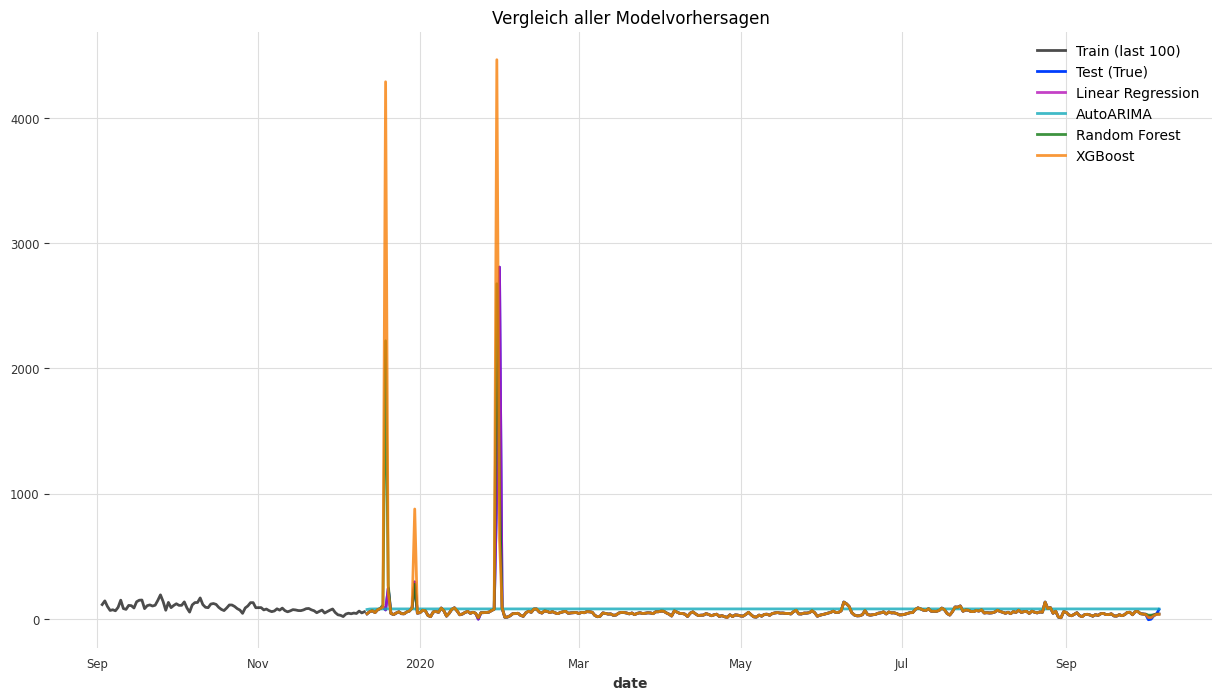

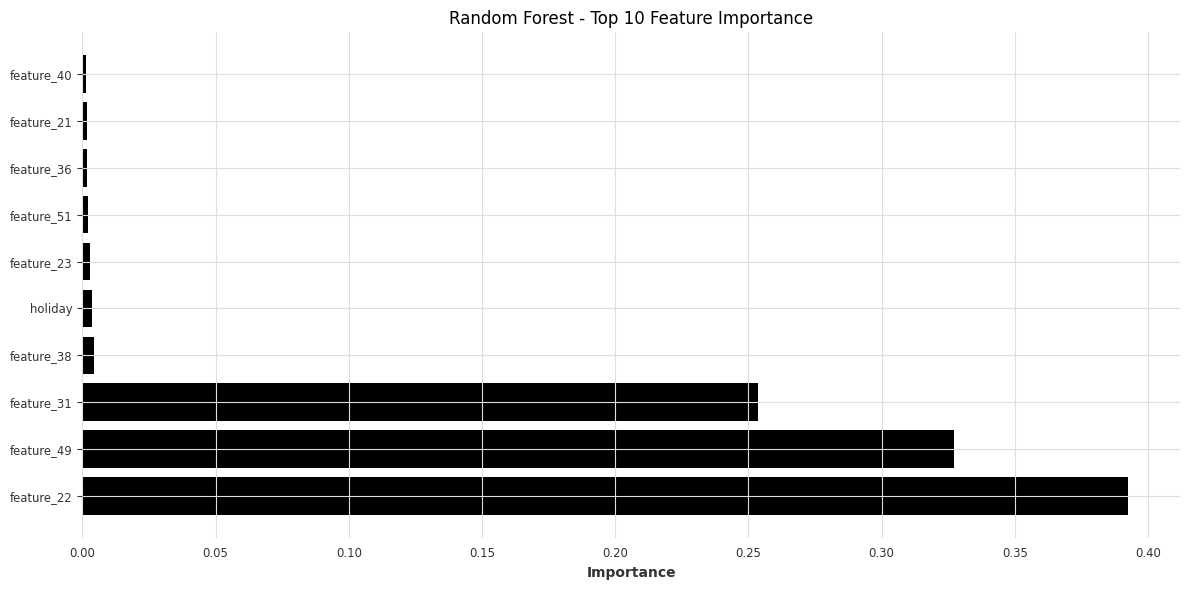


Training XGBoost without future covariates...
XGBoost (no covariates) MAE: 42.71, RMSE: 171.59, R²: -0.007


In [ ]:
# Plot all predictions together
plt.figure(figsize=(15, 8))
train[-100:].plot(label="Train (last 100)", alpha=0.7)
test.plot(label="Test (True)", linewidth=2)
pred.plot(label="Linear Regression", alpha=0.8)
pred_arima.plot(label="AutoARIMA", alpha=0.8)
pred_rf.plot(label="Random Forest", alpha=0.8)
pred_xgb.plot(label="XGBoost", alpha=0.8)
plt.title("Vergleich aller Modelvorhersagen")
plt.legend()
plt.show()

# Fixed: Feature importance for tree-based models
if hasattr(rf_model.model, 'feature_importances_'):
    # Get the actual lag values from the model's internal structure
    # For Darts models, lags might be stored differently
    try:
        # Try to access the actual lag values
        if hasattr(rf_model, 'lags'):
            # Convert lags to absolute values for naming
            lag_values = []
            if rf_model.lags is not None:
                if isinstance(rf_model.lags, list):
                    lag_values = [abs(int(lag)) for lag in rf_model.lags if str(lag).lstrip('-').isdigit()]
                elif isinstance(rf_model.lags, int):
                    lag_values = [abs(rf_model.lags)]

            feature_names = [f"lag_{lag}" for lag in lag_values] + feature_cols

            # Make sure we don't exceed the number of features
            n_features = len(rf_model.model.feature_importances_)
            if len(feature_names) > n_features:
                feature_names = feature_names[:n_features]
            elif len(feature_names) < n_features:
                # Add generic names for extra features
                feature_names += [f"feature_{i}" for i in range(len(feature_names), n_features)]

            importance_rf = rf_model.model.feature_importances_

            # Get top 10 features
            top_indices = np.argsort(importance_rf)[-10:][::-1]
            top_features = [feature_names[i] for i in top_indices]
            top_importance = importance_rf[top_indices]

            plt.figure(figsize=(12, 6))
            plt.barh(top_features, top_importance)
            plt.title("Random Forest - Top 10 Feature Importance")
            plt.xlabel("Importance")
            plt.tight_layout()
            plt.show()

    except Exception as e:
        print(f"Could not plot feature importance: {e}")

# Additional: XGBoost without future covariates (as fallback)
print("\nTraining XGBoost without future covariates...")
xgb_simple = SKLearnModel(
    model=XGBRegressor(
        n_estimators=300,
        max_depth=6,
        learning_rate=0.05,
        random_state=42
    ),
    lags=[-1, -2, -7, -14, -30]  # More lags to compensate for no future covariates
)

xgb_simple.fit(train)
pred_xgb_simple = xgb_simple.predict(len(test))

mae_xgb_simple = mae(test, pred_xgb_simple)
rmse_xgb_simple = rmse(test, pred_xgb_simple)
r2_xgb_simple = r2_score(test, pred_xgb_simple)
print(f"XGBoost (no covariates) MAE: {mae_xgb_simple:.2f}, RMSE: {rmse_xgb_simple:.2f}, R²: {r2_xgb_simple:.3f}")


In [47]:

# 1. Focus on error analysis
errors = np.abs(test.values() - pred.values())
worst_days_indices = np.argsort(errors.flatten())[-10:]  # Top 10 worst predictions

# Analyze what's different on these days
print("Worst prediction days:")
for idx in worst_days_indices:
    print(f"Day {idx}: Error = {errors.flatten()[idx]:.2f}")



# 3. Use different loss functions (if custom models)
# XGBoost with quantile regression for better MAE
xgb_mae_optimized = XGBRegressor(
    objective='reg:absoluteerror',  # MAE instead of MSE
    n_estimators=500,
    max_depth=6,
    learning_rate=0.05
)

Worst prediction days:
Day 49: Error = 0.00
Day 44: Error = 0.00
Day 50: Error = 0.00
Day 293: Error = 2.03
Day 298: Error = 2.68
Day 294: Error = 3.73
Day 297: Error = 8.56
Day 296: Error = 22.05
Day 295: Error = 24.10
Day 299: Error = 36.33
